# Random Forest Demo

See [official documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details of RandomForestClassifier.

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (10, 6)

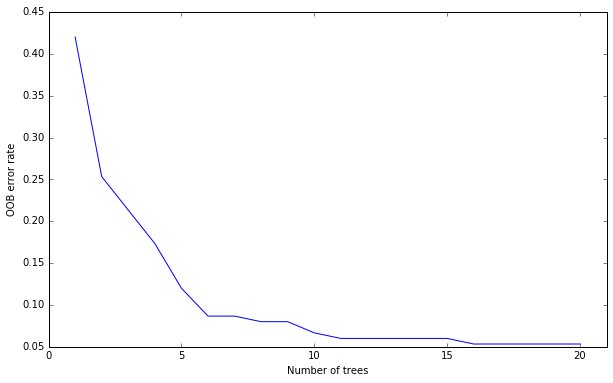

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

np.seterr(divide='ignore', invalid='ignore')
ntree = 20
# load data
iris = load_iris()
x_train = iris.data
y_train = iris.target

# create model and train
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, n_jobs=-1, oob_score=True,
                                    warm_start=True)

for i in range(ntree):
    growing_rf.fit(x_train, y_train)
    errors.append(1 - growing_rf.oob_score_)
    growing_rf.n_estimators += 1

plt.plot(np.r_[1:ntree + 1], errors, "-b") 
axs = plt.gca() # get current axis
axs.set_xlim([0, 21])
# axs.set_xticks([1] + [i * 5 for i in range(1,5)])   
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.show()   